In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [6]:
from math import exp

e = exp(1)

class Gaussian_helper: 
    def __init__(self, a, px, py, c=1): 
        self.a=a
        self.px=px
        self.py=py
        self.c=c
      
    def __call__(self, grid_x, grid_y): 
        return np.where(True, self.calc(grid_x, grid_y), 0)

    def calc(self, x, y): 
        return self.a*e**(-((x-self.px)**2+(y-self.py)**2)/(2*self.c**2))

    def derive(self, x, y): 
        tmp = -(self.a/self.c**2)*e**(-((x-self.px)**2+(y-self.py)**2)/(2*self.c**2))
        return (tmp*(x-self.px), tmp*(y-self.py))

class Gaussian:
    def __init__(self, apc:list): 
        self.g_list = [Gaussian_helper(*i) for i in apc]

    def __call__(self, grid_x, grid_y): 
        return sum([G(grid_x, grid_y) for G in self.g_list])
        
    def calc(self, x, y): 
        return sum([G.calc(x, y) for G in self.g_list])

    def derive(self, x, y): 
        d_list = [G.derive(x, y) for G in self.g_list]
        return [sum(i) for i in zip(*d_list)]



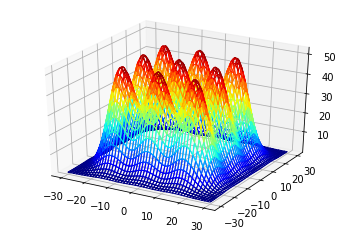

In [27]:
from matplotlib import cm

#G1, G2, G3 = Gaussian_(5,0,20), Gaussian_(2,4), Gaussian_(1,2)
sizes = []
for ix in [-15,0,15]:
  for iy in [-15,0,15]:
    sizes.append((50,ix,iy,5))
G = Gaussian(sizes)

grid_size = 30
x = np.linspace(-grid_size, grid_size, 1000)
y = np.linspace(-grid_size, grid_size, 1000)
X, Y = np.meshgrid(x, y)

Z = G(X, Y)
ax = plt.axes(projection='3d')
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.jet(norm(Z))
surf = ax.plot_surface(X, Y, Z, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))


In [57]:
x = 2*grid_size*np.random.random_sample()-grid_size
y = 2*grid_size*np.random.random_sample()-grid_size
lr = 0.2

print(f"minimum loss: {G.calc(0, 0)}\n")
print("***before learning***")
print(f"(x, y) = ({x}, {y})")
print(f"loss: {G.calc(x, y)}\n")

X_ = [x]
Y_ = [y]
Z_ = [G.calc(x, y)]
ux = []
uy = []
uz = []
for i in range(100):
  d = G.derive(x, y)
  x += lr*d[0]
  y += lr*d[1]
  X_.append(x)
  Y_.append(y)
  Z_.append(G.calc(x, y))
  ux.append(X_[-1]-X_[-2])
  uy.append(Y_[-1]-Y_[-2])
  uz.append(Z_[-1]-Z_[-2])

ux.append(0)
uy.append(0)
uz.append(0)

print("***after learning***")
print(f"(x, y) = ({x}, {y})")
print(f"loss: {G.calc(x, y)}")


minimum loss: 52.2464812684658

***before learning***
(x, y) = (25.370193048165255, 9.257884800966998)
loss: 4.057774243967907

***after learning***
(x, y) = (14.816218065483332, 14.816218065483328)
loss: 51.17891063866571


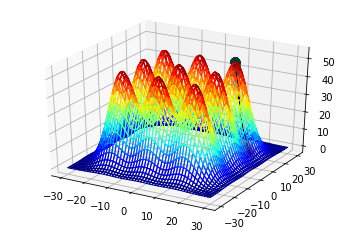

In [58]:
ax = plt.axes(projection='3d')
ax.quiver(X_,Y_,Z_,ux,uy,uz,color='black')
ax.scatter(X_, Y_, Z_, c=Z_, cmap='BrBG', linewidth=5)
surf = ax.plot_surface(X, Y, Z, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))